# Data analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

In [7]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data = {}
for directory in neighbouring_directories:
    for filename in os.listdir(directory):
        if filename.endswith(".npy"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)

print(data.keys())

dict_keys(['BG_NOISE', 'N_BG_CLUSTERS', 'LEARNING_RATE_HL', 'REWARD_WINDOW', 'N_DISTRACTORS', 'RA_NOISE', 'LEARNING_RATE_RL'])


In [8]:
def plot_returns(directory, param):
    returns = 100*data[directory]
    n_values = min(returns.shape)
    above_threshold = np.zeros(n_values)
    for i in range(n_values):
        above_threshold[i] = np.sum(returns[:,i] > 70)
    above_threshold /= returns.shape[0]
    plt.figure()
    means = np.mean(returns, axis=0)
    std = np.std(returns, axis=0)
    plt.plot(means, label='mean', marker='o')
    plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
    for i in range(n_values):
        plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
    plt.ylim(0, 100)
    for i in range(n_values):
        plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
    plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
    plt.xticks(np.arange(n_values, step=1), labels = parameter_names[param]) # type: ignore
    plt.title(f'Performance for different values of {param}')
    plt.xlabel(param)
    plt.ylabel('Return %')
    plt.legend()
    plt.show()

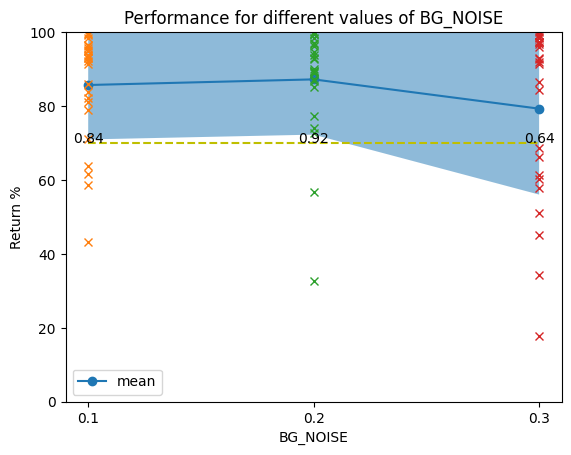

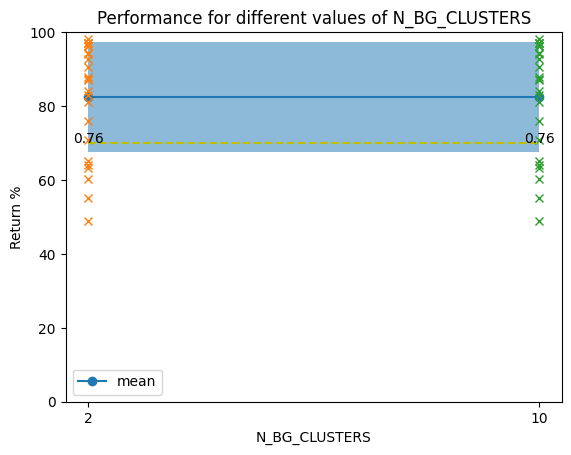

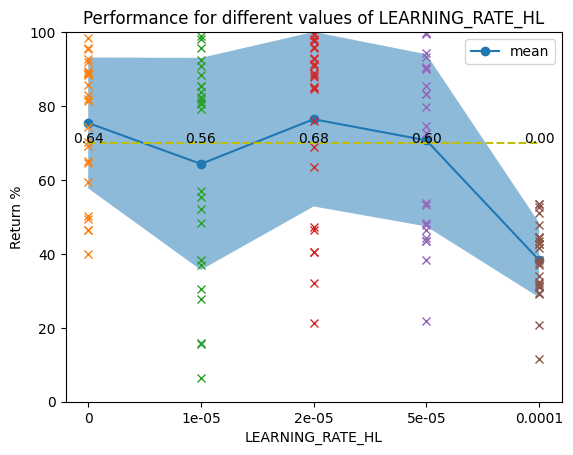

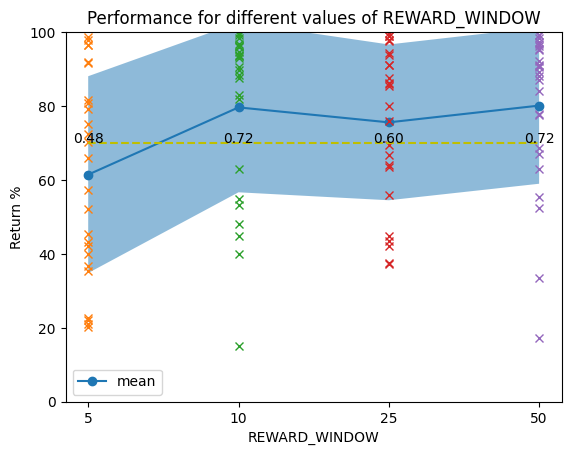

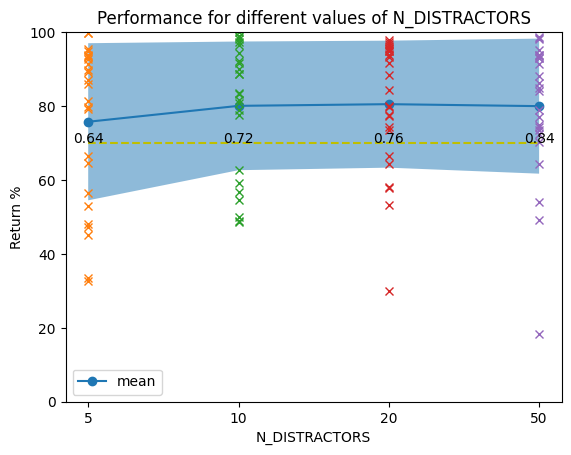

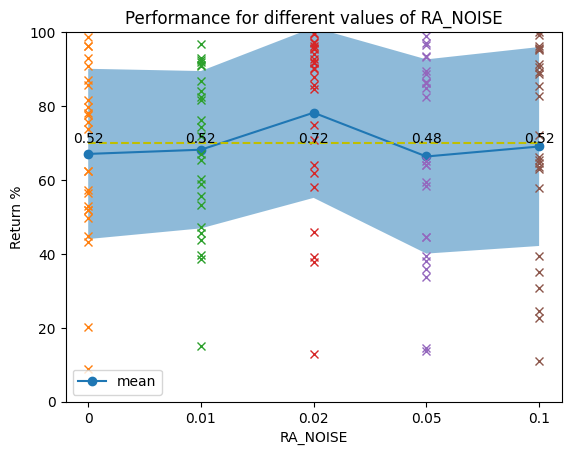

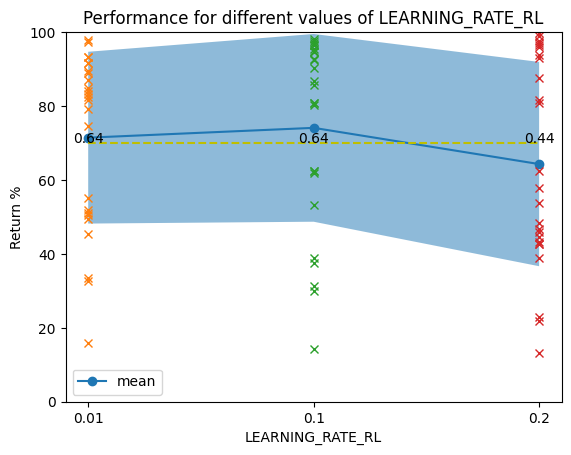

In [9]:
for index, directory in enumerate(data.keys()):
    param = directory
    plot_returns(directory, param) # type: ignore

In [10]:
# # def plot_returns(data, key):
# for index, directory in enumerate(neighbouring_directories):
#     param = directory
#     returns = 100*data[neighbouring_directories[index]]
#     n_values = min(returns.shape)
#     above_threshold = np.zeros(n_values)
#     for i in range(n_values):
#         above_threshold[i] = np.sum(returns[:,i] > 70)
#     above_threshold /= returns.shape[0]
#     plt.figure()
#     means = np.mean(returns, axis=0)
#     std = np.std(returns, axis=0)
#     plt.plot(means, label='mean', marker='o')
#     plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
#     for i in range(n_values):
#         plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
#     plt.ylim(0, 100)
#     for i in range(n_values):
#         plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
#     plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
#     plt.xticks(np.arange(n_values, step=1), labels = parameter_names[param])
#     plt.title(f'Performance for different values of {param}')
#     plt.xlabel(param)
#     plt.ylabel('Return %')
#     plt.legend()
#     plt.show()
